In [1]:
# takes 30s
# read acbl events sql table, cleanup, write to acbl_events_cleaned.pkl.

# Next steps:
# any training needed?

# Previous steps:
# acbl-download-details-to-json.ipynb
# acbl-json-to-sql.ipynb

# todo:
# more reports

In [2]:
import config
import pandas as pd
import pathlib
import pickle
import sqlalchemy
import sys

import matplotlib
import matplotlib.pyplot as plt

In [ ]:
sys.path.append(str(pathlib.Path.cwd().parent.joinpath('mlBridgeLib')))
sys.path
import mlBridgeLib

In [3]:
# override pandas display options
mlBridgeLib.pd_options_display()

In [4]:
rootPath = pathlib.Path('e:/bridge/data')
acblPath = rootPath.joinpath('acbl')

In [5]:
# using pathlib to create sqlite path.
db_connection_string = 'sqlite:///'+acblPath.joinpath('acbl-details.sqlite').as_posix()
db_connection_string

'sqlite:///e:/bridge/data/acbl/acbl-details.sqlite'

In [6]:
def db_to_frames_dict(engine):
    meta = sqlalchemy.MetaData()
    meta.reflect(engine)
    tables = meta.tables.keys()
    cnx = engine.raw_connection()
    return {t: pd.read_sql(f'SELECT * FROM {t}', cnx ) for t in tables}

In [7]:
# create dict of sql SELECT statements.
sql_selects_d = {
    'events':'SELECT id AS event_id, name AS event_name, club_name, club_id_number, type as event_type, rating, board_scoring_method, stratification_type, winner_type, club_class, tb_count, club_session, start_date, end_date, mpLimits, olExists FROM events'
    }

In [8]:
# takes 12s
dfs = {}
for k,v in sql_selects_d.items():
    engine = sqlalchemy.create_engine(db_connection_string) #, echo=True)
    with engine.connect() as con:
        if False:
            dfs = db_to_frames_dict(engine)
        else:
            print(f'{k}:{v}')
            dfs[k] = pd.read_sql(v, con)
    engine.dispose()

events:SELECT id AS event_id, name AS event_name, club_name, club_id_number, type as event_type, rating, board_scoring_method, stratification_type, winner_type, club_class, tb_count, club_session, start_date, end_date, mpLimits, olExists FROM events


In [9]:
for k,v in dfs.items():
    display(k,v.head(),v.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375232 entries, 0 to 375231
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   event_id              375232 non-null  int64  
 1   event_name            375232 non-null  object 
 2   club_name             375232 non-null  object 
 3   club_id_number        375232 non-null  int64  
 4   event_type            375232 non-null  object 
 5   rating                375232 non-null  int64  
 6   board_scoring_method  375232 non-null  object 
 7   stratification_type   375232 non-null  object 
 8   winner_type           375232 non-null  int64  
 9   club_class            375232 non-null  int64  
 10  tb_count              375232 non-null  float64
 11  club_session          375232 non-null  object 
 12  start_date            375232 non-null  object 
 13  end_date              375232 non-null  object 
 14  mpLimits              375232 non-null  object 
 15  

'events'

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
0,100961,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,02/17/2020,02/17/2020,MP Limits: None,1.00
1,110886,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,02/24/2020,02/24/2020,MP Limits: None,1.00
2,114736,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.00,Monday Evening,03/02/2020,03/02/2020,MP Limits: None,1.00
3,126385,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.50,Monday Evening,03/09/2020,03/09/2020,MP Limits: None/100,1.00
4,126418,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,4.00,Monday Evening,03/16/2020,03/16/2020,MP Limits: None,1.00


None

In [10]:
events_dtypes = {
    'event_id':'int64',
    'event_name':'string',
    'club_name':'string',
    'club_id_number':'int64',
    'event_type':'string',
    'rating':'int8',
    'board_scoring_method':'string',
    'stratification_type':'string',
    'winner_type':'int8',
    'club_class':'int8',
    'tb_count':'float32',
    'club_session':'string',
    'start_date':'datetime64[ns]',
    'end_date':'datetime64[ns]',
    'mpLimits':'string',
    'olExists':'boolean'
}
df_events = dfs['events']
df_events = df_events.astype(events_dtypes)
display(df_events.isna().sum(), df_events.info(), df_events.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375232 entries, 0 to 375231
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   event_id              375232 non-null  int64         
 1   event_name            375232 non-null  string        
 2   club_name             375232 non-null  string        
 3   club_id_number        375232 non-null  int64         
 4   event_type            375232 non-null  string        
 5   rating                375232 non-null  int8          
 6   board_scoring_method  375232 non-null  string        
 7   stratification_type   375232 non-null  string        
 8   winner_type           375232 non-null  int8          
 9   club_class            375232 non-null  int8          
 10  tb_count              375232 non-null  float32       
 11  club_session          375232 non-null  string        
 12  start_date            375232 non-null  datetime64[ns]
 13 

event_id                   0
event_name                 0
club_name                  0
club_id_number             0
event_type                 0
rating                     0
board_scoring_method       0
stratification_type        0
winner_type                0
club_class                 0
tb_count                   0
club_session               0
start_date                 0
end_date                   0
mpLimits                   0
olExists                7037
dtype: int64

None

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
0,100961,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-17,2020-02-17,MP Limits: None,True
1,110886,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-24,2020-02-24,MP Limits: None,True
2,114736,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.00,Monday Evening,2020-03-02,2020-03-02,MP Limits: None,True
3,126385,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.50,Monday Evening,2020-03-09,2020-03-09,MP Limits: None/100,True
4,126418,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,4.00,Monday Evening,2020-03-16,2020-03-16,MP Limits: None,True


In [11]:
cols = df_events.columns
for col in cols:
    vc = df_events[col].value_counts()
    display(col,len(df_events[col]),len(vc),vc)

'event_id'

375232

375232

100961    1
321153    1
320702    1
32054     1
320162    1
319976    1
319866    1
319446    1
319418    1
319112    1
318686    1
318420    1
318019    1
317682    1
317222    1
316914    1
316603    1
316109    1
315906    1
315435    1
315422    1
321123    1
321494    1
314639    1
322166    1
         ..
163922    1
16331     1
172992    1
173755    1
173820    1
178663    1
181833    1
181432    1
180718    1
18053     1
180269    1
180100    1
179243    1
17896     1
178194    1
173968    1
177542    1
177101    1
176919    1
17662     1
176145    1
175521    1
175147    1
17461     1
88830     1
Name: event_id, Length: 375232, dtype: int64

'event_name'

375232

230419

Monday Afternoon Pairs                          10636
Open Pairs                                      10620
Wednesday Afternoon Pairs                        9323
Tuesday Afternoon Pairs                          8294
Thursday Afternoon Pairs                         7907
Friday Afternoon Pairs                           7651
Friday Morning Pairs                             4204
Monday Morning Pairs                             3996
Event Name                                       3617
Wednesday Morning Pairs                          3511
Monday Evening Pairs                             3137
Tuesday Morning Pairs                            2962
Tuesday Evening Pairs                            2952
Thursday Morning Pairs                           2571
Saturday Afternoon Pairs                         2463
Thursday Evening Pairs                           1987
Wednesday Evening Pairs                          1891
Sunday Afternoon Pairs                           1764
Stratified Open Pairs       

'club_name'

375232

3601

Sagamore at Shelter Rock          5264
Bridge Academy of North Dallas    3605
Duncan Bridge Center              3543
Gryphon II DBC                    3356
Honors                            2893
Ft Lauderdale Bridge Club         2650
OneWorld BOSTON                   2543
LA Bridge Assn                    2503
The Villages DBC                  2372
Duke City Bridge Club             2145
Bridge 21 DBC                     2086
Brunswick Bridge                  2078
Bridge Boardroom                  2065
St Louis Bridge Center            2003
Vanderbilt BC Of Nashville        1739
Vero Beach Bridge Center          1583
Palm Beach BC At St Catherine     1549
Edmonton Bridge Centre            1522
Bridge Center of St Paul          1490
Denver Metro Bridge Studio        1481
Fun And Games DBC                 1469
Westside Bridge Academy           1448
Grand River Bridge Club           1425
Chicago Duplicate Bridge          1415
Newtown Bridge Club               1370
                         

'club_id_number'

375232

2489

266064    5274
260117    4172
263830    3543
248732    3356
217489    2897
232132    2893
221739    2884
108571    2652
277178    2543
267476    2533
166520    2235
262410    2197
103333    2145
239152    2108
275388    2086
239343    2065
272740    1882
105346    1783
218727    1716
267120    1716
206037    1686
225987    1661
199240    1631
267005    1625
100222    1527
          ... 
252981       1
265058       1
274217       1
254045       1
253633       1
276139       1
264804       1
197012       1
226811       1
902296       1
127662       1
212993       1
901025       1
248096       1
271569       1
266999       1
903518       1
220400       1
271700       1
260844       1
134007       1
276931       1
901447       1
271791       1
112136       1
Name: club_id_number, Length: 2489, dtype: int64

'event_type'

375232

5

PAIRS               367541
TEAMS                 4604
HOME_STYLE_PAIRS      2379
INDIVIDUAL             654
BAM                     54
Name: event_type, dtype: Int64

'rating'

375232

61

1     258482
68     16212
70     14455
2      14357
14      6911
30      6246
20      6225
3       5912
74      5567
55      4889
69      4527
43      4307
4       3660
72      3440
73      3242
7       3098
12      2302
63      2002
66      1798
8       1283
71       905
75       570
0        519
22       516
49       488
       ...  
47        87
24        67
17        66
44        64
48        59
65        58
35        57
15        42
21        39
45        29
58        29
64        28
76        27
23        21
28        20
56        19
19        16
57        15
38        15
27         8
61         3
37         3
34         1
60         1
59         1
Name: rating, Length: 61, dtype: int64

'board_scoring_method'

375232

8

MATCH_POINTS    367133
IMPS              6925
BUTLER_IMPS        733
CROSS_IMPS         231
OTHER              150
BAM                 42
AGGREGATE           16
HYBRID               2
Name: board_scoring_method, dtype: Int64

'stratification_type'

375232

2

AVERAGE    235418
HIGHEST    139814
Name: stratification_type, dtype: Int64

'winner_type'

375232

2

2    219930
1    155302
Name: winner_type, dtype: int64

'club_class'

375232

4

4    336688
3     37018
2      1425
1       101
Name: club_class, dtype: int64

'tb_count'

375232

127

5.00     34584
6.00     34185
4.00     32787
7.00     31032
8.00     27678
3.00     27282
9.00     23613
10.00    19895
11.00    16155
12.00    13440
13.00    10742
14.00     8627
4.50      8331
3.50      7788
5.50      7317
15.00     6818
6.50      5990
16.00     5739
7.50      4927
17.00     4412
8.50      3797
2.50      3671
18.00     3512
2.00      3479
9.50      3015
         ...  
42.50        3
0.50         3
62.00        2
46.50        2
70.00        2
44.50        2
58.00        2
60.00        2
59.00        2
60.50        1
68.50        1
47.50        1
76.50        1
75.50        1
61.00        1
5.25         1
66.00        1
49.50        1
57.00        1
55.00        1
51.50        1
52.50        1
4.25         1
2.75         1
93.00        1
Name: tb_count, Length: 127, dtype: int64

'club_session'

375232

21

Monday Afternoon       40094
Wednesday Afternoon    36184
Tuesday Afternoon      33862
Thursday Afternoon     33326
Friday Afternoon       31150
Friday Morning         21853
Monday Morning         21283
Thursday Morning       19623
Wednesday Morning      19298
Tuesday Morning        19215
Saturday Afternoon     18617
Sunday Afternoon       15698
Tuesday Evening        12199
Monday Evening         12002
Saturday Morning       11156
Wednesday Evening       9591
Thursday Evening        9340
Sunday Morning          4586
Friday Evening          3106
Saturday Evening        1769
Sunday Evening          1280
Name: club_session, dtype: Int64

'start_date'

375232

1749

2020-02-10    1169
2020-03-02    1156
2020-02-24    1153
2020-02-03    1142
2020-03-09    1128
2020-02-17    1067
2020-02-19    1017
2020-01-27    1014
2020-03-04    1012
2020-02-12    1010
2020-02-11     999
2020-02-25     997
2020-02-26     987
2020-02-18     981
2020-02-05     978
2020-03-10     967
2020-02-04     965
2020-01-13     963
2020-01-06     962
2020-03-03     961
2020-03-11     955
2020-01-20     916
2021-07-26     897
2020-01-28     890
2020-02-13     889
              ... 
2015-02-12       1
2014-11-27       1
2014-10-09       1
2018-06-07       1
2014-10-23       1
2018-05-31       1
2014-10-30       1
2018-05-24       1
2014-11-06       1
2014-11-13       1
2018-05-17       1
2014-11-20       1
2018-05-10       1
2015-02-05       1
2014-12-04       1
2014-12-11       1
2014-12-18       1
2018-05-03       1
2018-04-26       1
2015-01-08       1
2018-04-19       1
2015-01-15       1
2015-01-29       1
2018-04-05       1
2018-06-20       1
Name: start_date, Length: 1749,

'end_date'

375232

1749

2020-02-10    1169
2020-03-02    1156
2020-02-24    1153
2020-02-03    1142
2020-03-09    1128
2020-02-17    1067
2020-02-19    1017
2020-01-27    1014
2020-03-04    1012
2020-02-12    1010
2020-02-11     999
2020-02-25     997
2020-02-26     987
2020-02-18     981
2020-02-05     978
2020-03-10     967
2020-02-04     965
2020-01-13     963
2020-01-06     962
2020-03-03     961
2020-03-11     955
2020-01-20     916
2021-07-26     897
2020-01-28     890
2020-02-13     889
              ... 
2015-02-12       1
2014-11-27       1
2014-10-09       1
2018-06-07       1
2014-10-23       1
2018-05-31       1
2014-10-30       1
2018-05-24       1
2014-11-06       1
2014-11-13       1
2018-05-17       1
2014-11-20       1
2018-05-10       1
2015-02-05       1
2014-12-04       1
2014-12-11       1
2014-12-18       1
2018-05-03       1
2018-04-26       1
2015-01-08       1
2018-04-19       1
2015-01-15       1
2015-01-29       1
2018-04-05       1
2018-06-20       1
Name: end_date, Length: 1749, d

'mpLimits'

375232

179784

MP Limits: None              25685
MP Limits: None/1500/500      8551
MP Limits: None/2000/750      7793
MP Limits: None/2500/500      5761
MP Limits: None/1000/500      5175
MP Limits: None/1000/300      4725
MP Limits: None/500/200       3859
MP Limits: None/2000/500      3805
MP Limits: None/200/50        3721
MP Limits: None/2000/1000     3695
MP Limits: None/1500/300      3236
MP Limits: None/2500/750      3079
MP Limits: None/500           2632
MP Limits: None/2500/1000     2625
MP Limits: None/1500/750      2595
MP Limits: None/500/300       1996
MP Limits: None/750/300       1940
MP Limits: None/200           1830
MP Limits: None/300/100       1812
MP Limits: None/500/100       1631
MP Limits: None/1000          1488
MP Limits: None/None/None     1485
MP Limits: None/1250/500      1463
MP Limits: 500/200/100        1409
MP Limits: None/300           1302
                             ...  
MP Limits: 301/120/34            1
MP Limits: 501/269/225           1
MP Limits: None/2833

'olExists'

375232

2

True     193658
False    174537
Name: olExists, dtype: Int64

In [12]:
df_events.isna().sum()

event_id                   0
event_name                 0
club_name                  0
club_id_number             0
event_type                 0
rating                     0
board_scoring_method       0
stratification_type        0
winner_type                0
club_class                 0
tb_count                   0
club_session               0
start_date                 0
end_date                   0
mpLimits                   0
olExists                7037
dtype: int64

In [13]:
# drop non-PAIRS events
rows_to_drop = df_events['event_type'].ne('PAIRS')
display(len(df_events),sum(rows_to_drop),df_events[rows_to_drop].head())
df_events.drop(df_events[rows_to_drop].index,inplace=True)
display(len(df_events),df_events.head())

375232

7691

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
2585,290831,Friday Afternoon Pairs,Oil City Bridge Club,100891,HOME_STYLE_PAIRS,1,IMPS,HIGHEST,1,4,2.00,Friday Afternoon,2021-03-26,2021-03-26,MP Limits: None,<NA>
2586,290832,Wednesday Afternoon Pairs,Oil City Bridge Club,100891,HOME_STYLE_PAIRS,1,IMPS,HIGHEST,1,4,2.00,Wednesday Afternoon,2021-03-31,2021-03-31,MP Limits: None,<NA>
2588,294240,Friday Afternoon Pairs,Oil City Bridge Club,100891,HOME_STYLE_PAIRS,1,IMPS,HIGHEST,1,4,2.00,Friday Afternoon,2021-04-09,2021-04-09,MP Limits: None,<NA>
2591,297875,Friday Afternoon Pairs,Oil City Bridge Club,100891,HOME_STYLE_PAIRS,1,IMPS,HIGHEST,1,4,2.00,Friday Afternoon,2021-04-16,2021-04-16,MP Limits: None,<NA>
2596,305173,Friday Afternoon Pairs,Oil City Bridge Club,100891,HOME_STYLE_PAIRS,1,IMPS,HIGHEST,1,4,2.00,Friday Afternoon,2021-04-30,2021-04-30,MP Limits: None,<NA>


367541

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
0,100961,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-17,2020-02-17,MP Limits: None,True
1,110886,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-24,2020-02-24,MP Limits: None,True
2,114736,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.00,Monday Evening,2020-03-02,2020-03-02,MP Limits: None,True
3,126385,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.50,Monday Evening,2020-03-09,2020-03-09,MP Limits: None/100,True
4,126418,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,4.00,Monday Evening,2020-03-16,2020-03-16,MP Limits: None,True


In [14]:
# drop non-MATCH_POINTS events
rows_to_drop = df_events['board_scoring_method'].ne('MATCH_POINTS')
display(len(df_events),sum(rows_to_drop),df_events[rows_to_drop].head())
df_events.drop(df_events[rows_to_drop].index,inplace=True)
display(len(df_events),df_events.head())

367541

1056

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
16,154265,#6844 Pairs Unit 456 - 18 Boards,Cariboo Bridge Club,100040,PAIRS,66,BUTLER_IMPS,HIGHEST,2,4,7.00,Sunday Evening,2020-06-21,2020-06-21,MP Limits: None/1167/786,False
273,136174,#566 **ARLINGTON Tx** 2:05 pm IMP Pairs,Arlington DBC Inc,100222,PAIRS,1,BUTLER_IMPS,HIGHEST,2,4,7.00,Friday Afternoon,2020-05-08,2020-05-08,MP Limits: None/2197/820,False
7374,31354,ACBL Instant Matchpoint,Duke City Bridge Club,103333,PAIRS,29,OTHER,HIGHEST,2,4,14.00,Thursday Afternoon,2019-10-31,2019-10-31,MP Limits: None/3500/1000,True
7375,31355,0-6K ACBL Instant Matchpo,Duke City Bridge Club,103333,PAIRS,29,OTHER,AVERAGE,2,4,14.00,Thursday Afternoon,2019-10-31,2019-10-31,MP Limits: 6000/1000/300,True
16135,131293,#9869 IMPs - Ft Lauderdale/Quick Tricks/Pompano,Ft Lauderdale Bridge Club,108571,PAIRS,1,BUTLER_IMPS,HIGHEST,2,4,8.00,Wednesday Evening,2020-04-22,2020-04-22,MP Limits: None/1047/427,False


366485

,event_id,event_name,club_name,club_id_number,event_type,rating,board_scoring_method,stratification_type,winner_type,club_class,tb_count,club_session,start_date,end_date,mpLimits,olExists
0,100961,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-17,2020-02-17,MP Limits: None,True
1,110886,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,3.50,Monday Evening,2020-02-24,2020-02-24,MP Limits: None,True
2,114736,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.00,Monday Evening,2020-03-02,2020-03-02,MP Limits: None,True
3,126385,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,5.50,Monday Evening,2020-03-09,2020-03-09,MP Limits: None/100,True
4,126418,Monday Evening Pairs,Cariboo Bridge Club 1,100040,PAIRS,1,MATCH_POINTS,HIGHEST,1,4,4.00,Monday Evening,2020-03-16,2020-03-16,MP Limits: None,True


In [15]:
acbl_events_cleaned_filename = 'acbl_events_cleaned.pkl'
acbl_events_cleaned_file = acblPath.joinpath(acbl_events_cleaned_filename)
with open(acbl_events_cleaned_file, 'wb') as f:
    pickle.dump(df_events, f)
print(f"Saved {acbl_events_cleaned_filename}: rows:{len(df_events)} size:{acbl_events_cleaned_file.stat().st_size}")

Saved e:\bridge\data\acbl\acbl_events_cleaned.pkl: rows:366485 size:66854086


In [16]:
acbl_events_cleaned_filename = 'acbl_events_cleaned.pkl'
acbl_events_cleaned_file = acblPath.joinpath(acbl_events_cleaned_filename)
with open(acbl_events_cleaned_file, 'rb') as f:
    df_events = pickle.load(f)
print(f"Loaded {acbl_events_cleaned_filename}: rows:{len(df_events)}")

Loaded e:\bridge\data\acbl\acbl_events_cleaned.pkl: rows:366485


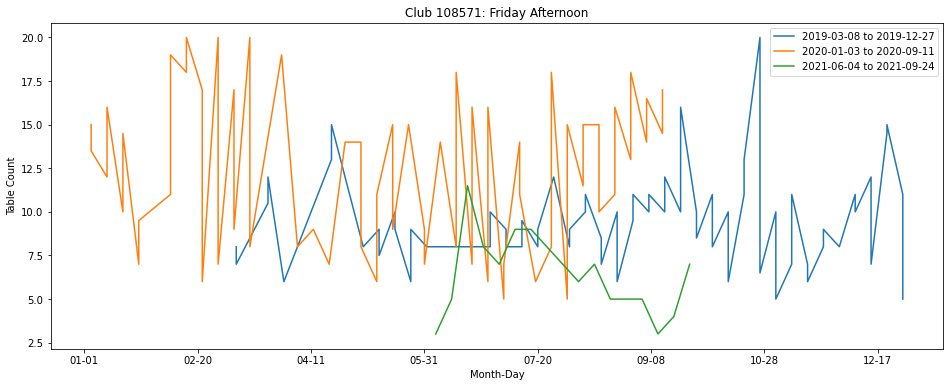

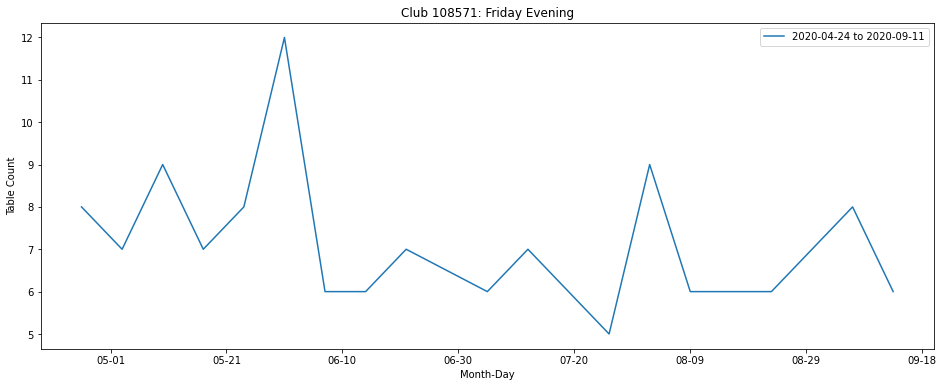

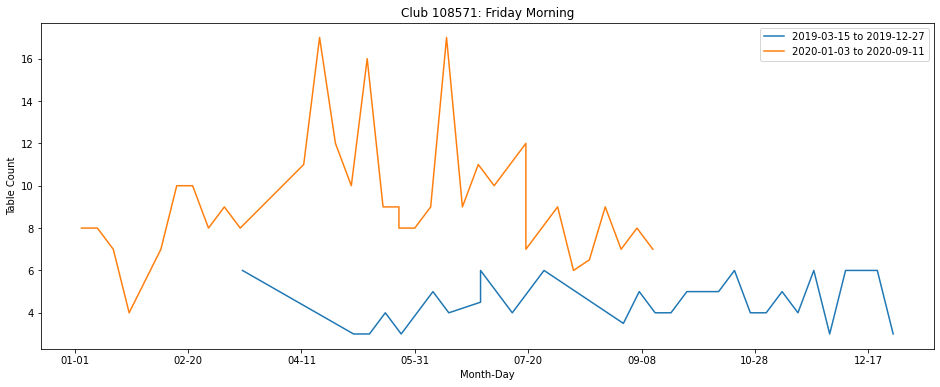

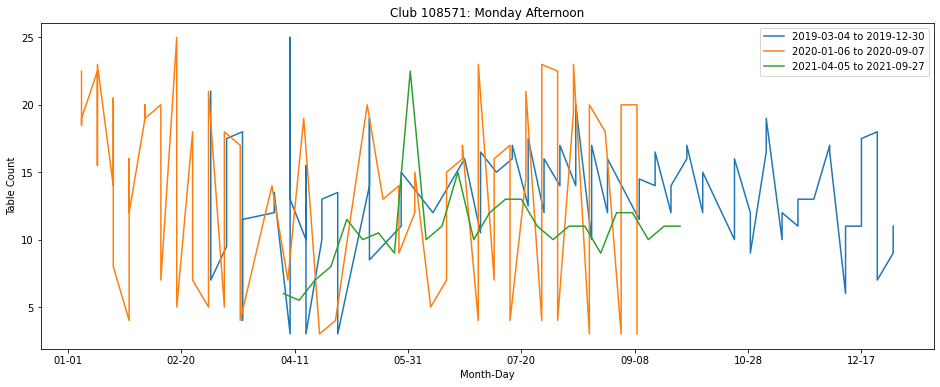

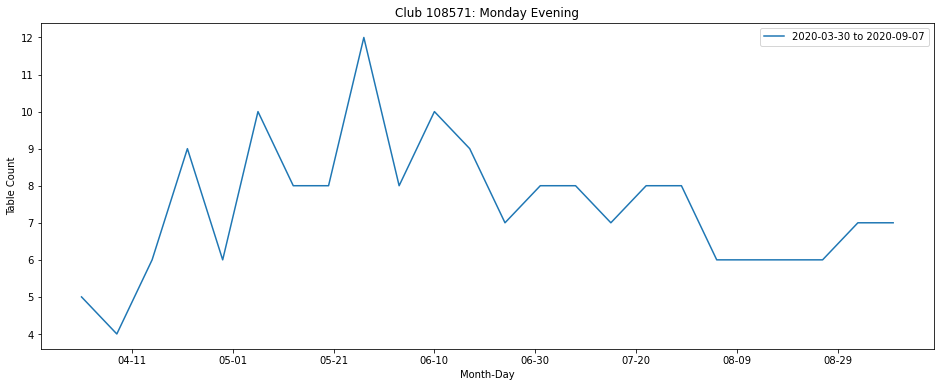

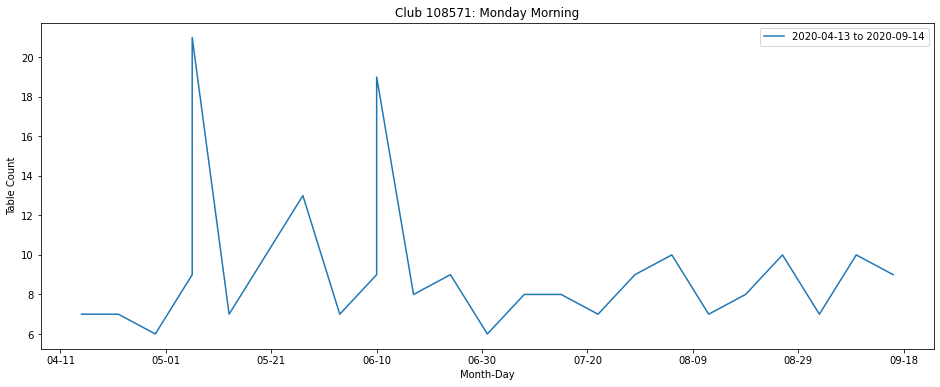

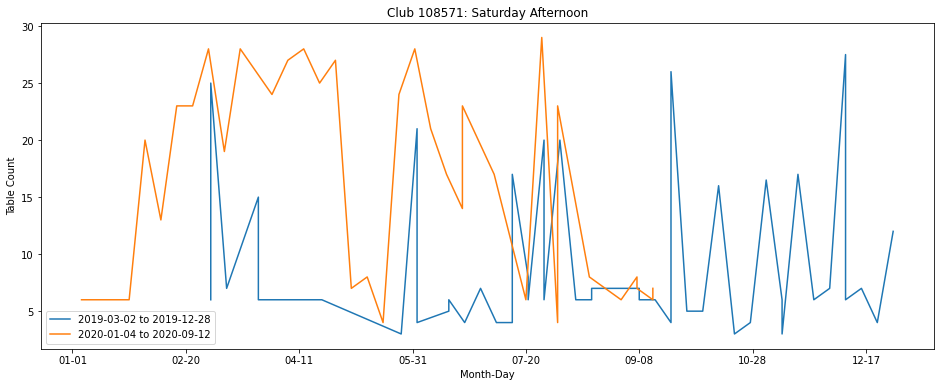

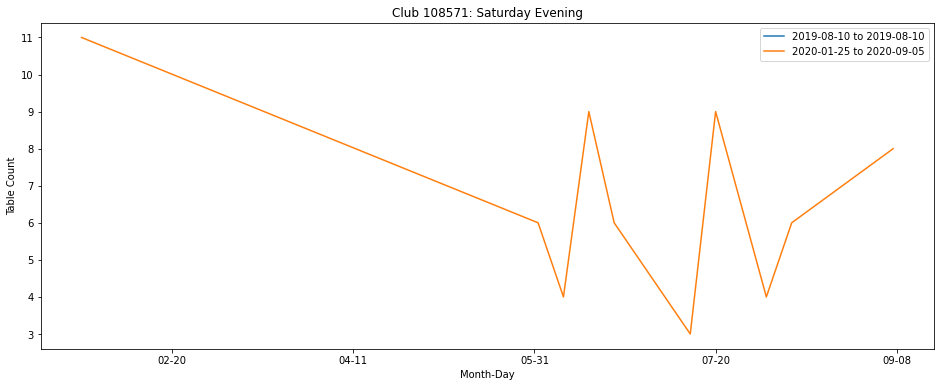

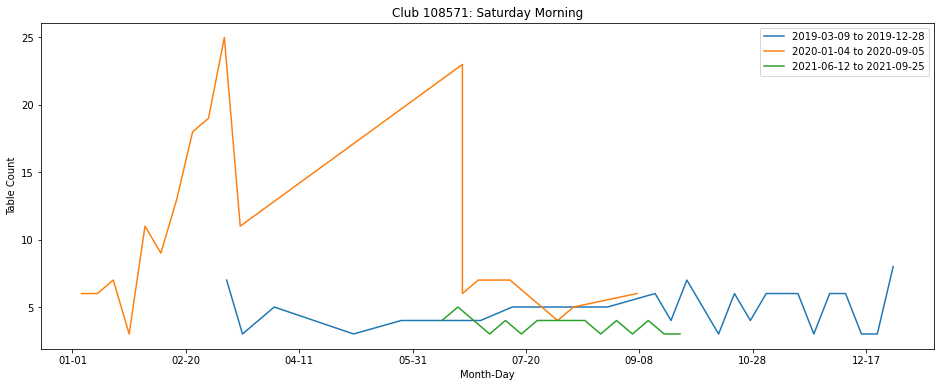

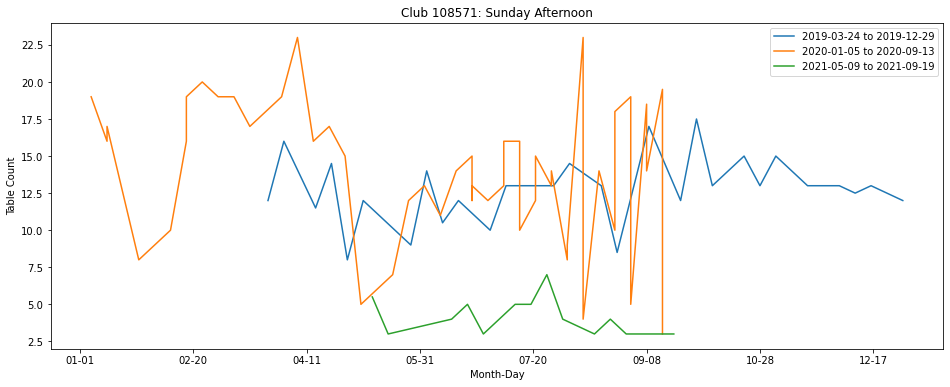

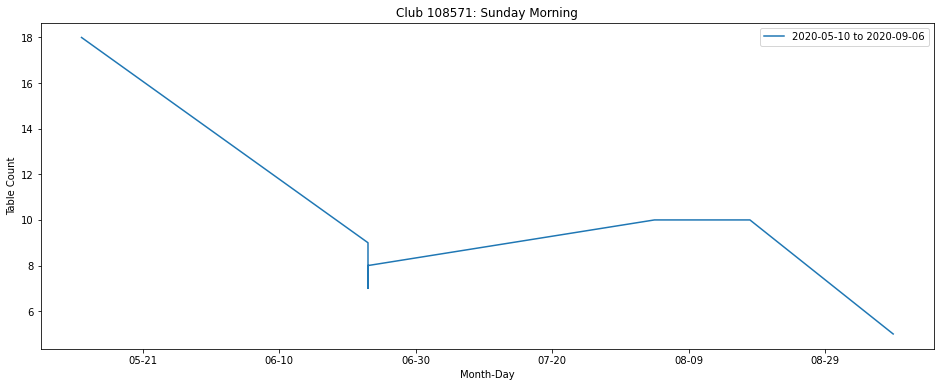

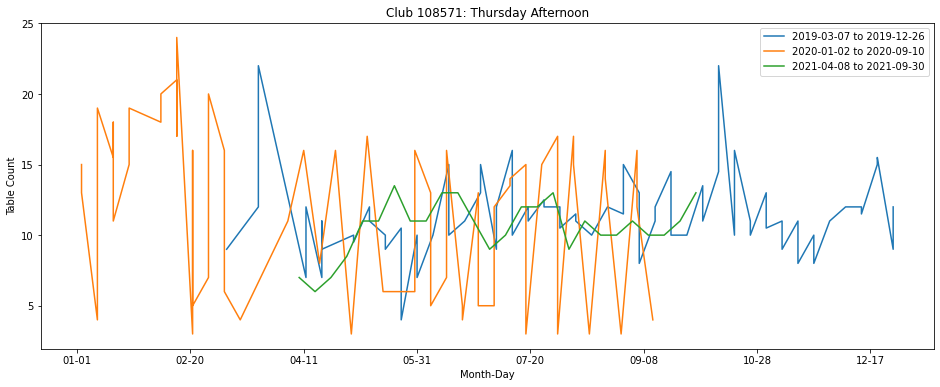

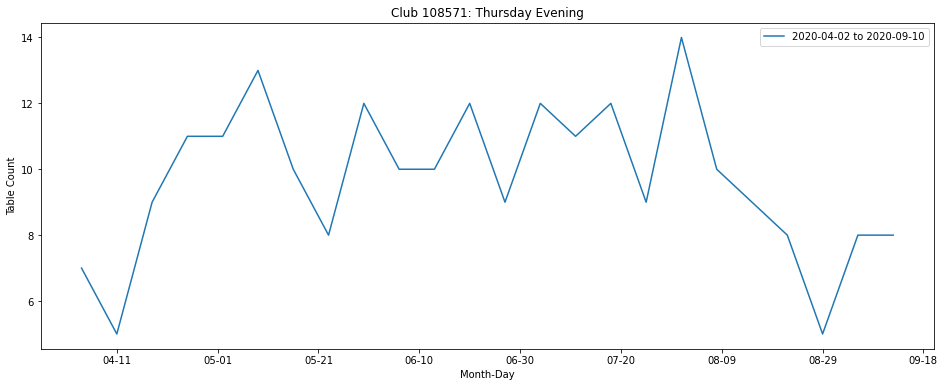

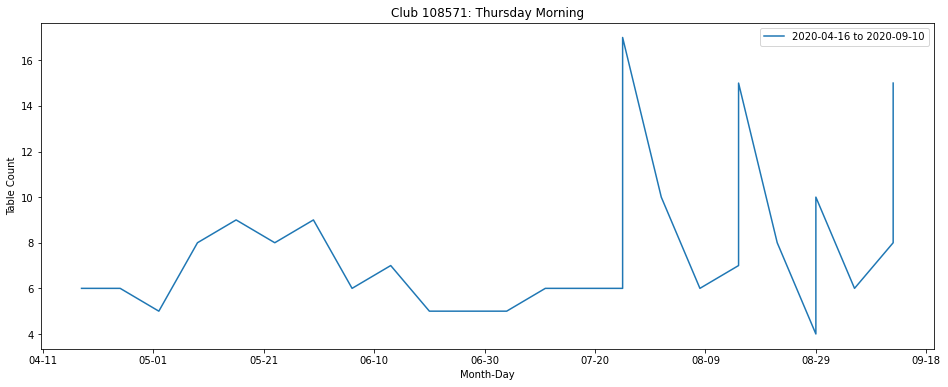

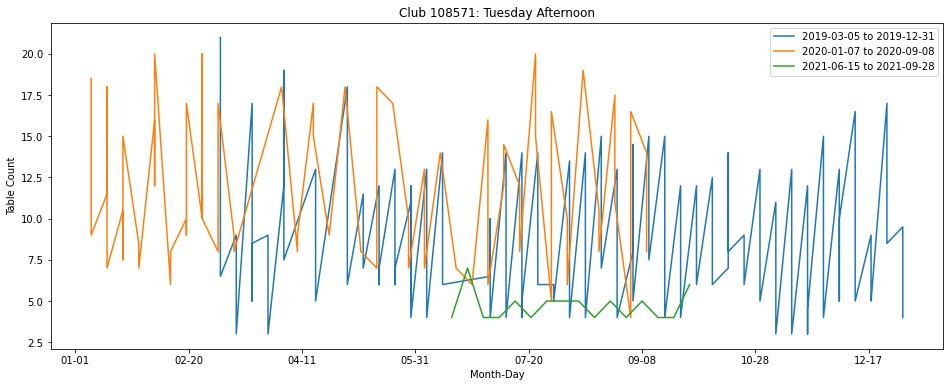

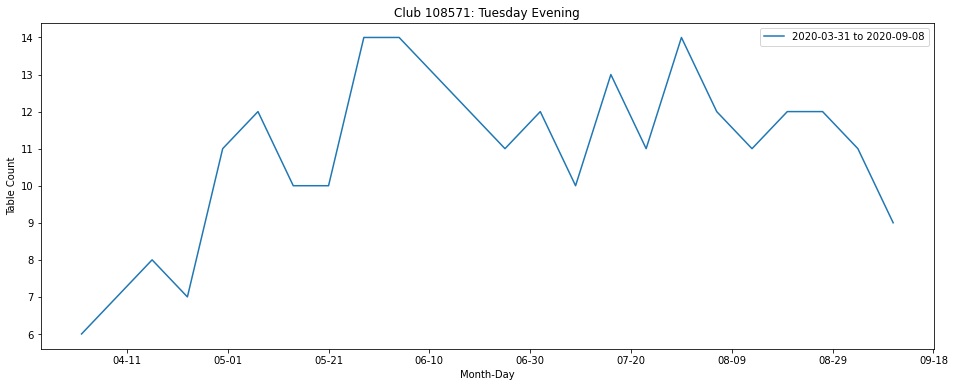

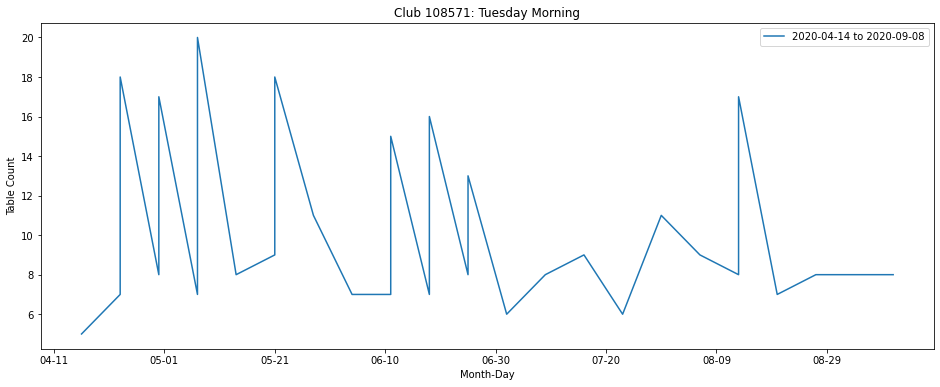

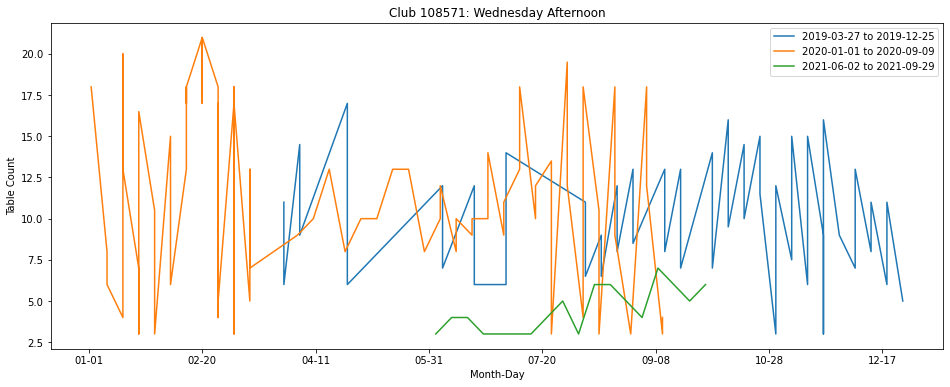

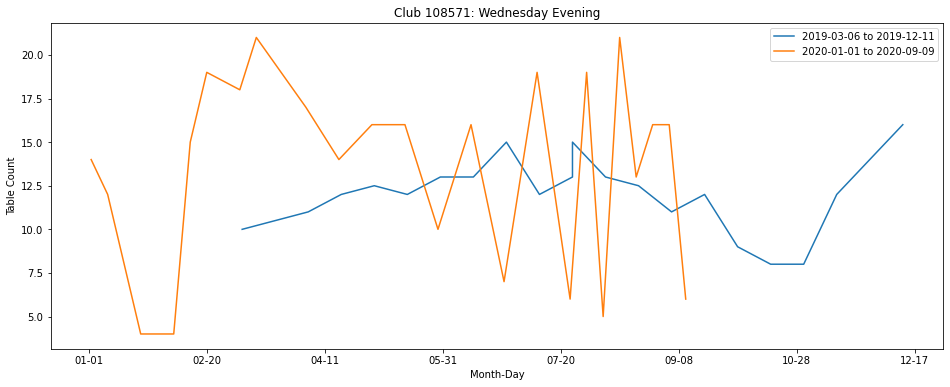

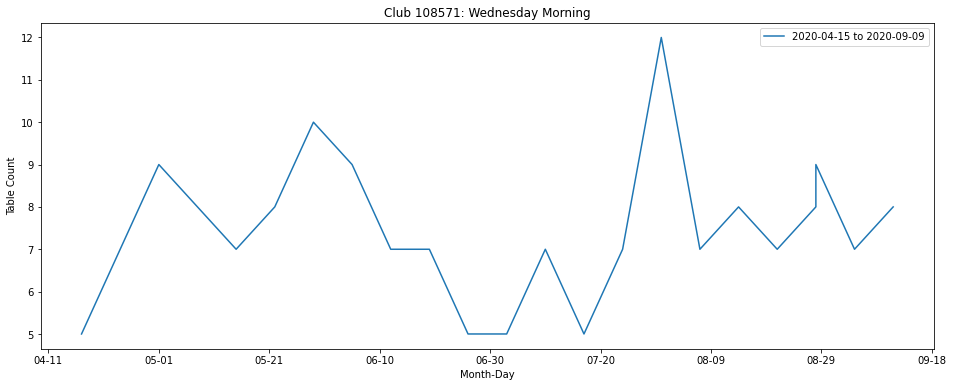

In [17]:
clubs = [108571] # [267096] # select club numbers
cing = df_events.groupby('club_id_number')
for cing_key,cing_df in cing:
    if cing_key not in clubs: # continue if club number is not in list
        continue
    #display(cing_key, len(cing_df), cing_df.head())
    eg = cing_df.groupby('club_session')
    for eg_key, eg_df in eg:
        #display(eg_key, len(eg_df), eg_df.head())
        if len(eg_df) < 10: # skip events with too few dates
            continue
        fig, ax = plt.subplots(figsize=(16,6))
        ax.set(xlabel='Month-Day',ylabel='Table Count',title='Club '+str(cing_key)+': '+eg_key)
        ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m-%d')) # show month-day for x-axis.
        for year in [2019,2020,2021]:
            row_filter = ~eg_df['olExists'] & eg_df['start_date'].dt.year.eq(year)
            if len(eg_df[row_filter]) == 0: # filter out years with no events
                continue
            #eg_df[row_filter].pivot(index='start_date', columns='club_session', values='tb_count')
            #ax = grp.plot(ax=ax, kind='line', x='x', y='y', c=key, label=key)
            #days = eg_df[row_filter]['start_date'].dt.strftime('%m-%d').sort_values() #.dt.month.sort_values()
            days = eg_df[row_filter]['start_date'].dt.dayofyear.sort_values() # can't figure out indexing unless julian.
            tables = eg_df[row_filter]['tb_count']
            min_date = eg_df[row_filter]['start_date'].min().strftime('%Y-%m-%d')
            max_date = eg_df[row_filter]['start_date'].max().strftime('%Y-%m-%d')
            plt.plot(days,tables,label=min_date+' to '+max_date)
        plt.legend()